In [112]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [113]:
data= pd.read_csv(r"F:\anlas\Python ile Makine Öğrenmesi\Online Retail.csv",index_col=0)
data2 = data.copy()
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [114]:
# missing values
print(data2.isnull().sum())
data2 = data2.dropna()
print(data2.isnull().sum())
# Less data is missing I delete

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [115]:
# Feature extraction and Control the feature for missing or incorrect datas
data2["Total"] = data2["Quantity"] * data2["UnitPrice"]

data2[data2["Total"] <= 0] # 10351 rows × 8 columns is incorrect 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [116]:
# According to DataSet Invoce Data begin with 'C' mean is cancellation
# I will make RFM analysis and I can delete them so that I can't use
data2 = data2.drop(data2[data2["Total"] <= 0].index)
data2[data2["Total"] <= 0] # deleted

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total


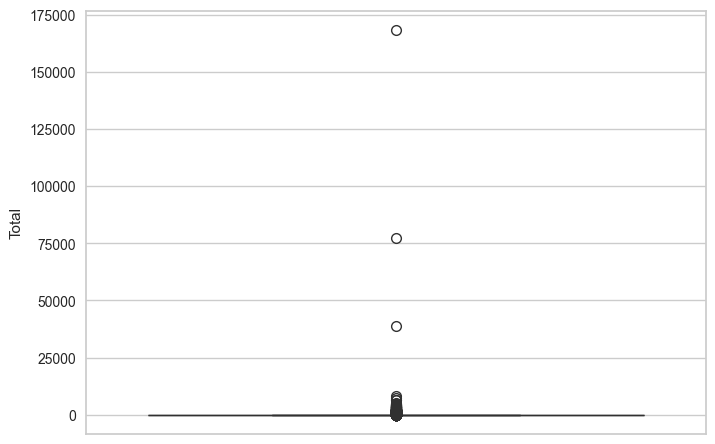

In [117]:
# Outliers checking
sns.boxplot(data2["Total"])
plt.show()

In [118]:
# There are few data as outlier They could make RFM mislead 
Q1 = data2["Total"].quantile(0.25)
Q3 = data2["Total"].quantile(0.75)
IQR = Q3 - Q1

lowerLimit = Q1 - 1.5 * IQR
upperLimit = Q3 + 1.5 * IQR

data2 = data2[~((data2["Total"] > upperLimit) | (data2["Total"] < lowerLimit))]
data2 = data2.reset_index(drop=True) # Out indexing was corrupted then reset it 
data2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
366638,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
366639,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
366640,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
366641,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [119]:
data2["CustomerID"].astype("int")

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
366638    12680
366639    12680
366640    12680
366641    12680
366642    12680
Name: CustomerID, Length: 366643, dtype: int64

In [120]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366643 entries, 0 to 366642
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    366643 non-null  object 
 1   StockCode    366643 non-null  object 
 2   Description  366643 non-null  object 
 3   Quantity     366643 non-null  int64  
 4   InvoiceDate  366643 non-null  object 
 5   UnitPrice    366643 non-null  float64
 6   CustomerID   366643 non-null  float64
 7   Country      366643 non-null  object 
 8   Total        366643 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 25.2+ MB
None


In [121]:
data2["InvoiceDate"] = pd.to_datetime(data2["InvoiceDate"])

In [122]:
# RFM structure
# We use static data, because of that I will use last date
today = data2["InvoiceDate"].max()
today

Timestamp('2011-12-09 12:50:00')

In [123]:
# Recency
r = (today - data2.groupby(by="CustomerID").agg({"InvoiceDate":"max"})).apply(lambda x : x.dt.days)
r

,InvoiceDate
CustomerID,
12347.0,1
12348.0,74
12349.0,18
12350.0,309
12352.0,35
...,...
18280.0,277
18281.0,180
18282.0,7


In [124]:
# Frequency
f = data2.groupby(by=["CustomerID","InvoiceNo"]).agg({"InvoiceNo":"count"})
f = f.groupby("CustomerID").agg({"InvoiceNo":"count"})
f

,InvoiceNo
CustomerID,
12347.0,7
12348.0,4
12349.0,1
12350.0,1
12352.0,7
...,...
18280.0,1
18281.0,1
18282.0,2


In [125]:
# Monetary
m = data2.groupby("CustomerID").agg({"Total":"sum"})
m

,Total
CustomerID,
12347.0,3174.62
12348.0,601.64
12349.0,1145.35
12350.0,334.40
12352.0,1505.74
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [126]:
RFM = r.merge(f,on="CustomerID").merge(m,on="CustomerID")
RFM = RFM.reset_index()
RFM.rename(columns={"CustomerID":"Customer","InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"},inplace=True)
RFM


,Customer,Recency,Frequency,Monetary
0,12347.0,1,7,3174.62
1,12348.0,74,4,601.64
2,12349.0,18,1,1145.35
3,12350.0,309,1,334.40
4,12352.0,35,7,1505.74
...,...,...,...,...
4189,18280.0,277,1,180.60
4190,18281.0,180,1,80.82
4191,18282.0,7,2,178.05
4192,18283.0,3,16,2094.88


In [127]:
df = RFM.iloc[:,1:]

scaler = MinMaxScaler()
dfNormalized = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
dfNormalized


,Recency,Frequency,Monetary
0,0.002681,0.030,0.035451
1,0.198391,0.015,0.006701
2,0.048257,0.000,0.012777
3,0.828418,0.000,0.003715
4,0.093834,0.030,0.016804
...,...,...,...
4189,0.742627,0.000,0.001997
4190,0.482574,0.000,0.000882
4191,0.018767,0.005,0.001968
4192,0.008043,0.075,0.023386


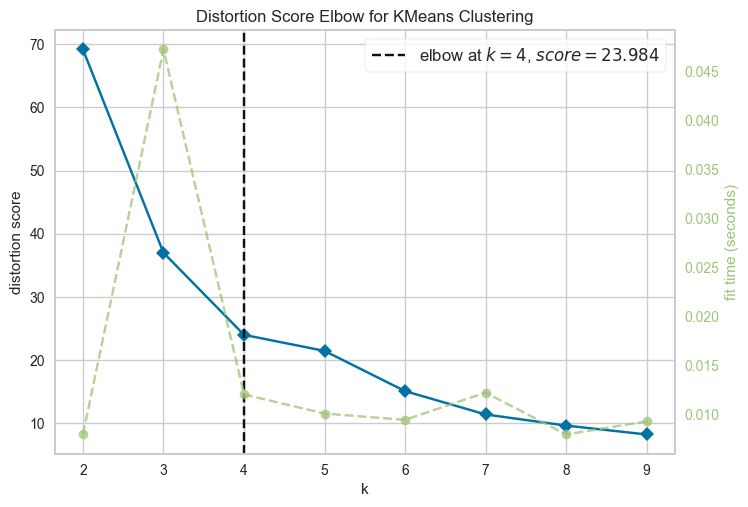

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [128]:
# Kmeans model parameter k using Elbow Method
kmodel = KMeans(random_state=3)

graph = KElbowVisualizer(kmodel,k=range(2,10))
graph.fit(dfNormalized)
graph.poof()

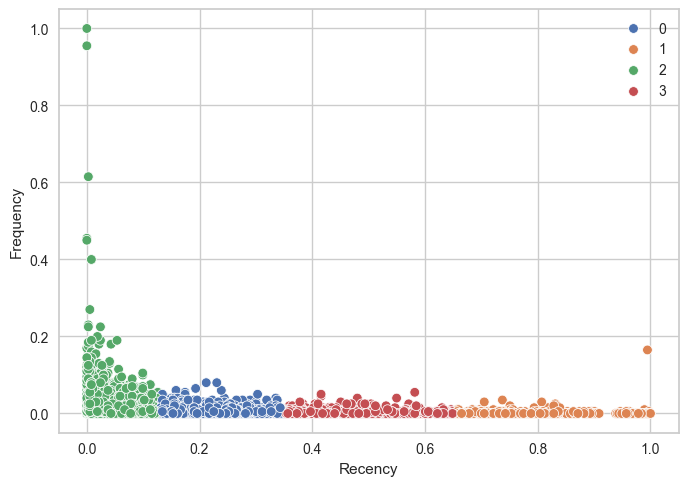

In [130]:
# k = 4 
kmodelNew = KMeans(n_clusters=4,random_state=3,init='k-means++')
kfit = kmodelNew.fit(dfNormalized)
labels = kfit.labels_

sns.scatterplot(x="Recency",y="Frequency",data=dfNormalized,hue=labels,palette="deep")
plt.show()

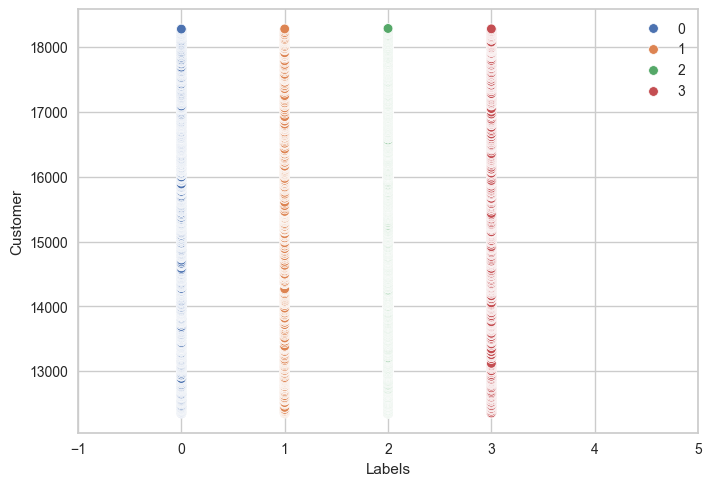

In [133]:
RFM["Labels"] = labels
sns.scatterplot(x="Labels",y="Customer",data=RFM,hue=labels,palette="deep")
plt.xlim([-1,5])
plt.show()

In [136]:
print(RFM.groupby("Labels")["Customer"].count())
print(RFM.groupby("Labels")["Customer"].mean())
print(RFM.groupby("Labels")["Customer"].describe())

Labels
0    1037
1     506
2    2038
3     613
Name: Customer, dtype: int64
Labels
0    15191.890068
1    15236.175889
2    15313.698234
3    15458.156607
Name: Customer, dtype: float64
         count          mean          std      min       25%      50%  \
Labels                                                                  
0       1037.0  15191.890068  1684.575253  12348.0  13750.00  15216.0   
1        506.0  15236.175889  1733.479151  12350.0  13715.25  15246.5   
2       2038.0  15313.698234  1725.426974  12347.0  13832.75  15337.0   
3        613.0  15458.156607  1730.182834  12353.0  14002.00  15507.0   

             75%      max  
Labels                     
0       16589.00  18278.0  
1       16688.75  18280.0  
2       16838.50  18287.0  
3       16965.00  18281.0  
